In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from pathlib import Path

heart_df = pd.read_csv("../data/uci/heart.csv")

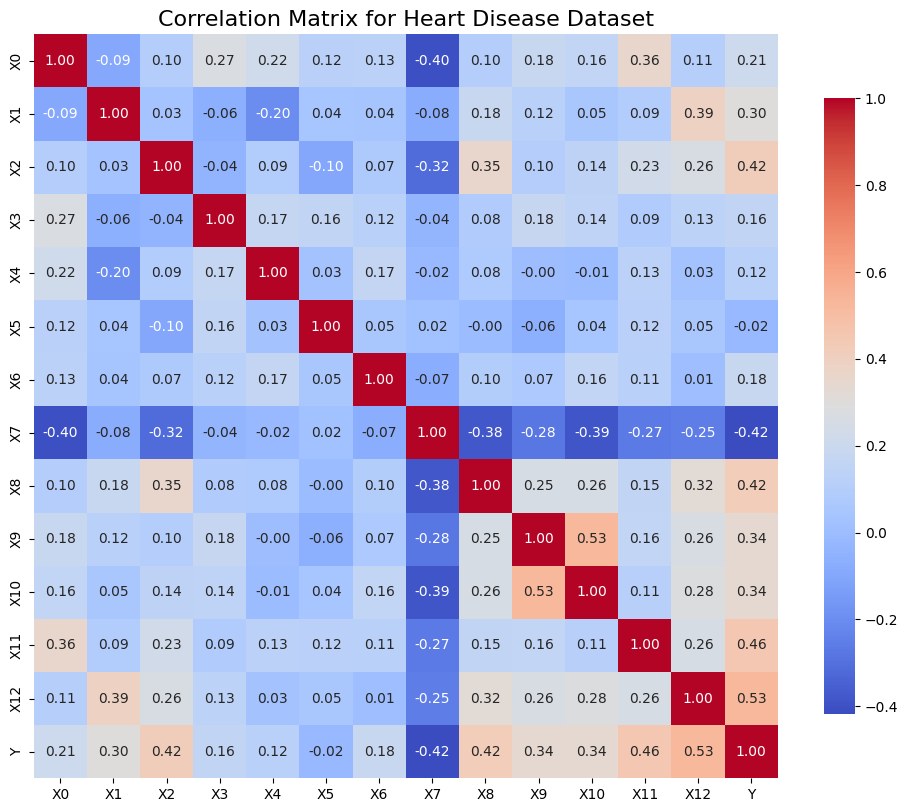

In [50]:
heart_corr = heart_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(heart_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix for Heart Disease Dataset", fontsize=16)
plt.show()

In [51]:
curr_dir = Path().resolve().parent
data_path = curr_dir / "data" / "feedzai"
filename = "Base.csv"
if not (data_path / filename).exists():
    path = kagglehub.dataset_download("sgpjesus/bank-account-fraud-dataset-neurips-2022")
    df = pd.read_csv(str(path + "/" + filename))
    df.to_csv(data_path / filename, index=False)

base_df = pd.read_csv(data_path / filename)
base_df.head(2)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0


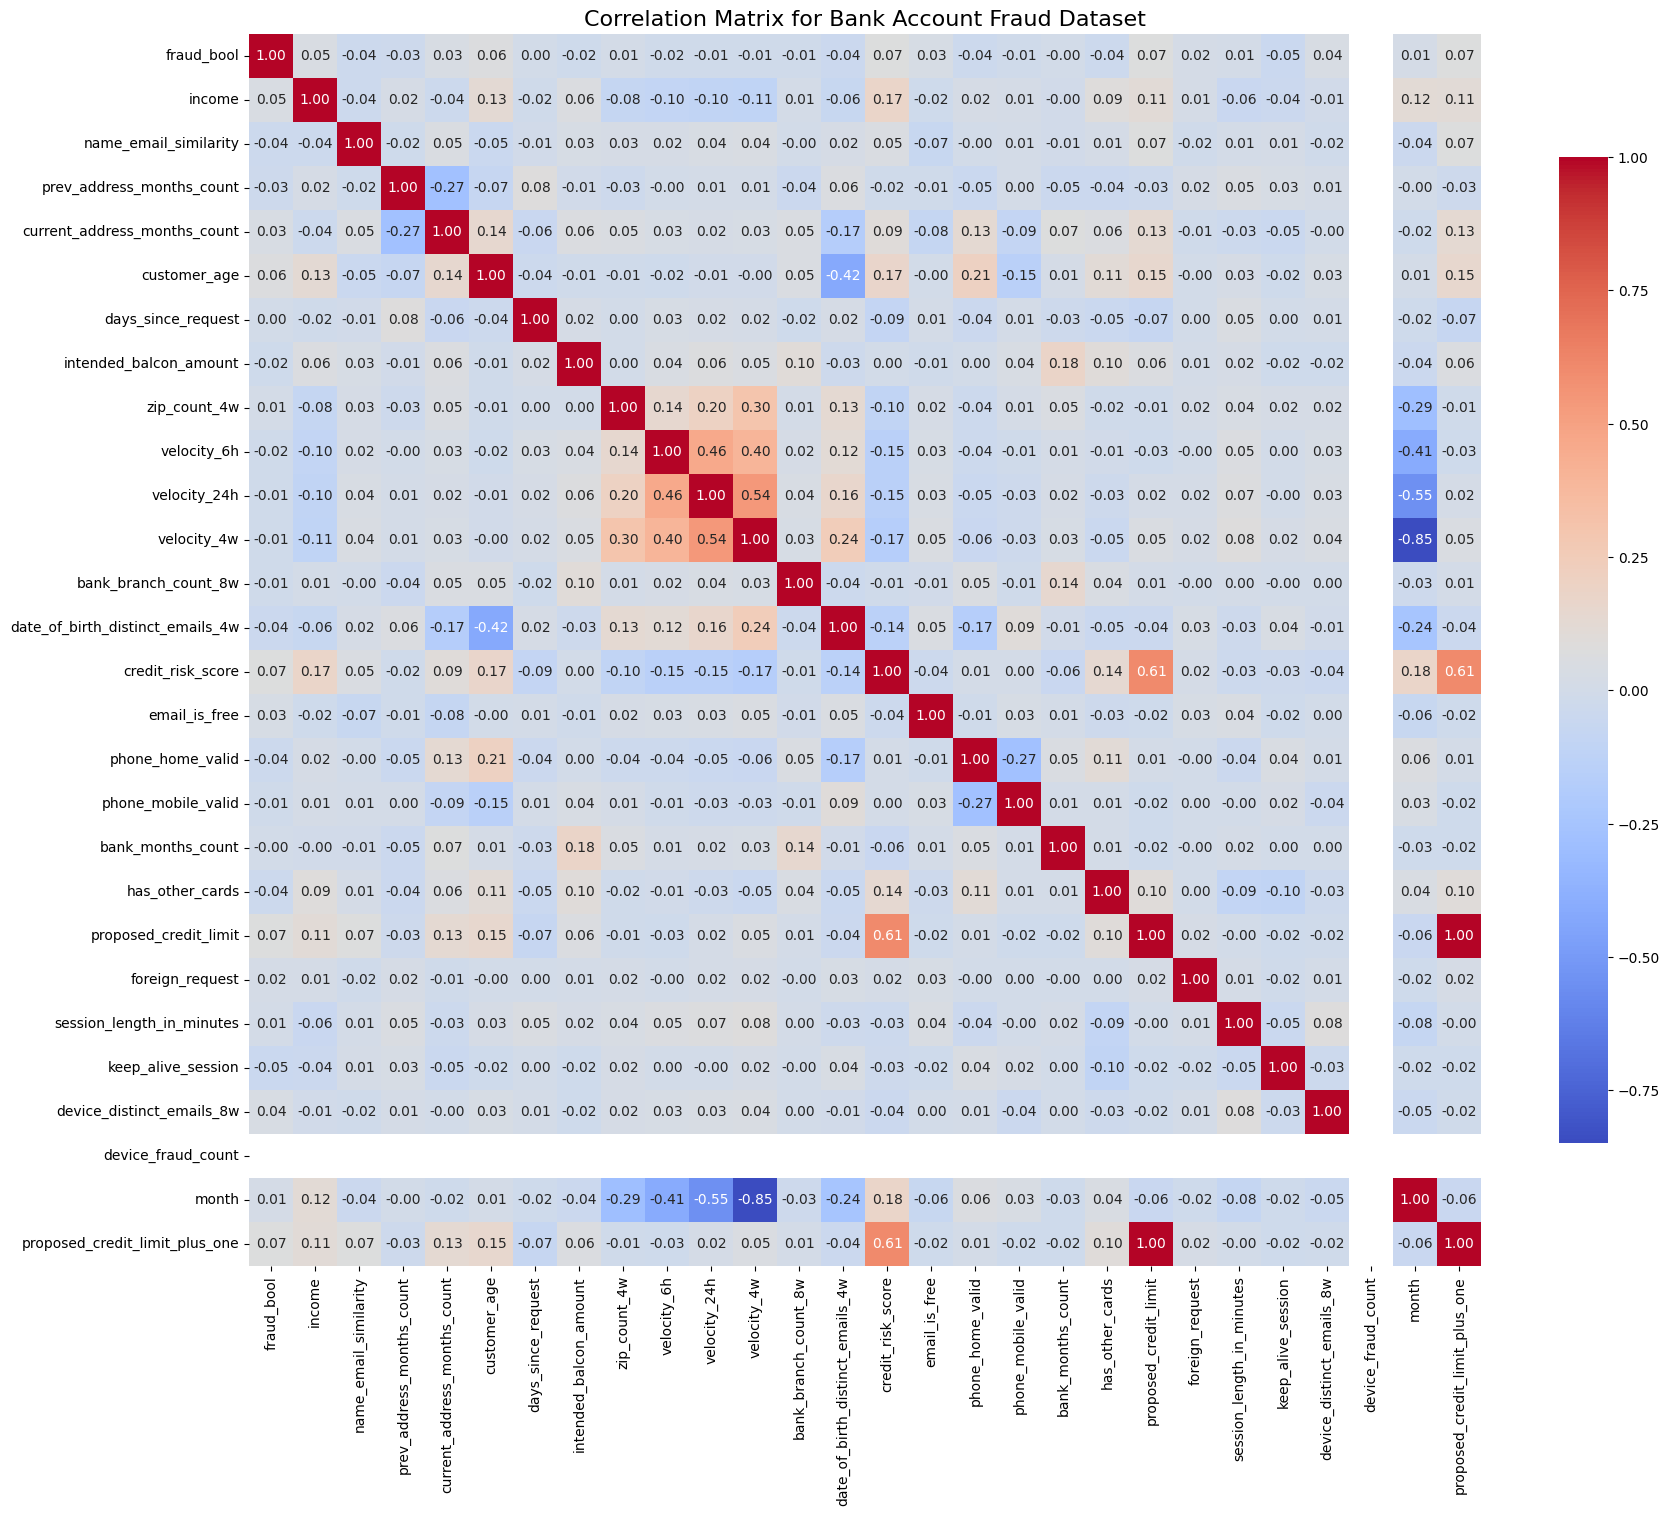

In [52]:
base_df['proposed_credit_limit_plus_one'] = base_df['proposed_credit_limit'] + 1
base_corr = base_df.corr(numeric_only=True)
plt.figure(figsize=(20, 16))
sns.heatmap(base_corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Correlation Matrix for Bank Account Fraud Dataset", fontsize=16)
plt.show()